In [1]:
import re
import os
import numpy as np
from utils import dict_file
from scipy.io import loadmat
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=1000)

In [2]:
def plot(energy, fidelity):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
    plt.ylabel('Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.scatter(energy, fidelity)
    plt.plot(energy, fidelity)

    plt.subplot(1, 2, 2)
    fidelity = 1 - fidelity
    plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
    plt.ylim(max(fidelity) * 2, min(fidelity) / 2)
    plt.ylabel('1 - Fidelity', fontsize=12)
    plt.xlabel('Energy', fontsize=12)
    plt.scatter(energy, fidelity)
    plt.plot(energy, fidelity)
    plt.yscale('log')
    plt.show()

Number of vec: 12


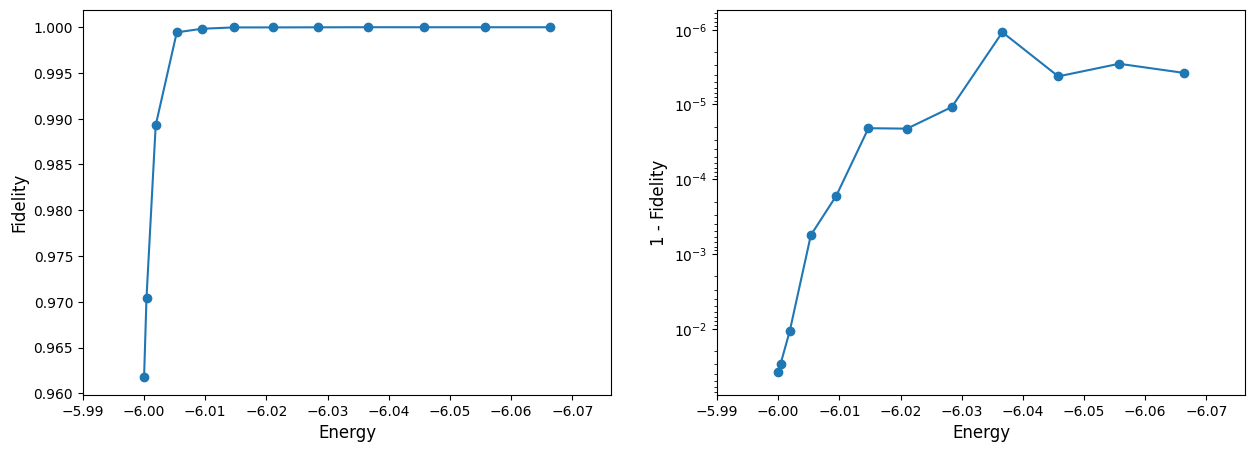

In [3]:
# 2024-01-19 Iter: 500, loss_tol: 1e-12, gtol: 1e-12
ind, D, num = 0, 9, 1
sub = sorted(os.listdir('./data_322'))[int(num)]
path = f'./data_322/{sub}'  # path of subfolder
key = lambda x: [int(y) if y.isdigit() else y for y in re.split('(\d+)', x)]
uMPS_name = [i for i in os.listdir(f'{path}/uMPS') if f'D{D}' in i]  # uMPS file name
uMPS_name = sorted(uMPS_name, key=key)  # sort 1,10,11,...,2 into 1,2,...,10,11
energy = np.array([loadmat(f'{path}/uMPS/{uMPS_name[i]}')['energy'][0][0] for i in range(len(uMPS_name))])
# fidelity = loadmat(f'{path}/fidelity_D{D}.mat')['fidelity'][0]
fidelity = {  # temp
    'num1': [
        0.9617554833246672, 0.9704350710275164, 0.9892862158667609, 0.9994392735740232, 0.9998335210796601,
        0.9999791735702322, 0.9999788854135511, 0.999989156906408, 0.9999989165174641, 0.9999957803995483,
        0.9999971372589765, 0.999996203411881
    ],
    'num2': [
        0.9979403341674667, 0.9987410136200778, 0.9981149476240618, 0.9999645534801196, 0.9999999185558714,
        0.9999939646096054, 0.9998898705819453, 0.9999962981831538, 0.9999989071276603, 0.9999997846801302,
        0.9999772972405885, 0.9999992245043285
    ],
    'num3': [
        0.933571314471861, 0.9854154582724525, 0.9902265987806878, 0.984422147597338, 0.9990012435708682,
        0.9999039782123605, 0.9999870885996305, 0.9999951446238738, 0.9999895277338212, 0.9999917063648567,
        0.999993638932889, 0.9999974593218525, 0.9999958457901077, 0.9999963908361263
    ],
    'num4': [
        0.8790454029015492, 0.9496673098930248, 0.9859338725834761, 0.9552253609073851, 0.9976386706712298,
        0.9998393021778118, 0.9999687343872679, 0.9999767734284357, 0.9999724404381551, 0.9999901947499402,
        0.9999957401767663, 0.9999908765462867, 0.999991909335785
    ],
    'num5': [
        0.9650684920430554, 0.9671393895510254, 0.9959301350667873, 0.9998719060007113, 0.9999458000372964,
        0.999965238977313, 0.9999795956021398, 0.9999926094762437, 0.999994031398969, 0.9999966228979644,
        0.9999968455767154, 0.9999983372056015
    ]
}
fidelity = np.array(fidelity[f'num{num}'])  # temp
energy = energy[:len(fidelity)]  # temp
print('Number of vec:', len(fidelity))
fidelity = fidelity[ind:]
energy = energy[ind:]
plot(energy, fidelity)

Number of vec: 19


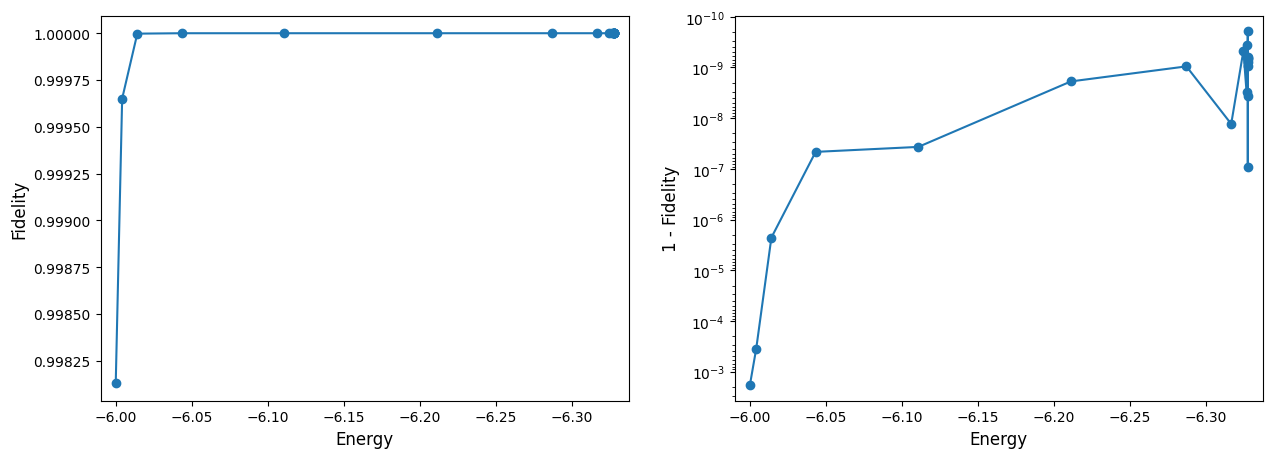

In [5]:
# 2024-01-17 Iter: 1000, loss_tol: 1e-12, gtol: 1e-12
ind, num = 0, 1
path = f'./data_322/old_mat'  # path of subfolder
key = lambda x: [int(y) if y.isdigit() else y for y in re.split('(\d+)', x)]
uMPS_name = [i for i in dict_file(f'{path}/uMPS').values() if f'num{num}' in i]  # uMPS file name
uMPS_name = sorted(uMPS_name, key=key)  # sort 1,10,11,...,2 into 1,2,...,10,11
uMPS_num = len(uMPS_name)  # number of uMPS in subfolder
energy = np.array([loadmat(f'{path}/uMPS/{uMPS_name[i]}')['energy'][0][0] for i in range(uMPS_num)])
fidelity = {
    'num1': [
        0.9981289692291885, 0.9996502776244797, 0.9999977325183597, 0.9999999538165608, 0.9999999631621687,
        0.9999999981178249, 0.9999999990491908, 0.9999999870247909, 0.9999999995325286, 0.999999996890498,
        0.9999999996435106, 0.9999999963128423, 0.99999999980957, 0.999999999235185, 0.9999999075029564,
        0.9999999990564923, 0.999999999366403, 0.999999999314469, 0.9999999993636202
    ],
    'num2': [
        0.9981389382415938, 0.9999956457715545, 0.9999999989847725, 0.9999999992166471, 0.9999999994119264,
        0.9999999838276614, 0.9999999996881306, 0.9999999977291498, 0.9999999991503257, 0.9999999997033882,
        0.9999999896057856, 0.9999999300315521, 0.9999999998494975, 0.9999999998906166
    ],
    'num3': [
        0.9989512240456557, 0.9999786804047124, 0.9999999465087674, 0.9999999798641659, 0.9999999946718774,
        0.9999999972457114, 0.9999999978088169, 0.9999999983712343, 0.9999999979912063, 0.9999999999990524,
        0.9999999983332415, 0.9999999901724372, 0.9999999978404583, 0.9999999999990449, 0.9999999438055598,
        0.9999999997751509, 0.9999999974705225, 0.9999999707900001, 0.9999998734971867, 0.9999999970784021,
        0.999999959234005, 0.9999999977125996, 0.9999999992892423, 0.9999999864215898, 0.9999999978886928,
        0.9999999996152665, 0.9999999854520261
    ],
    'num4': [
        0.9656594608333953, 0.9999999488783722, 0.9999999966379637, 0.9999999959912085, 0.9999999993446539,
        0.9999999964659846, 0.9999999948222436, 0.9999999985258305, 0.9999998942063467, 0.9999999988240501,
        0.9999999605588056, 0.9999999783544692, 0.9999999962843825, 0.9999999976736509, 0.9999999724574212,
        0.9999999979586802, 0.9999999976737428, 0.9999999922975977, 0.999999995683543, 0.9999999986328687,
        0.999999996570117, 0.99999999365461, 0.9999999964703045, 0.9999999935444874, 0.9999999968145721,
        0.9999999999990123, 0.9999999299585973, 0.9999999857817421, 0.9999999553321547
    ],
    'num5': [
        0.9995150962808503, 0.9999999779451315, 0.9999999734990139, 0.9999999996027182, 0.9999999313142587,
        0.9999999998956567, 0.999999971373524, 0.9999999998434825, 0.9999999359663397, 0.9999999998980577,
        0.9999999993656031, 0.9999999046012363, 0.9999999353031803, 0.9999999999006519, 0.9999999998807851,
        0.9999999998763585, 0.9999999727034927, 0.9999999482890065, 0.9999999997819247, 0.999999873765143,
        0.9999999901369732, 0.9999999989891394
    ]
}
fidelity = np.array(fidelity[f'num{num}'])
print('Number of vec:', len(fidelity))
fidelity = fidelity[ind:]
energy = energy[ind:]
plot(energy, fidelity)

Number of vec: 19


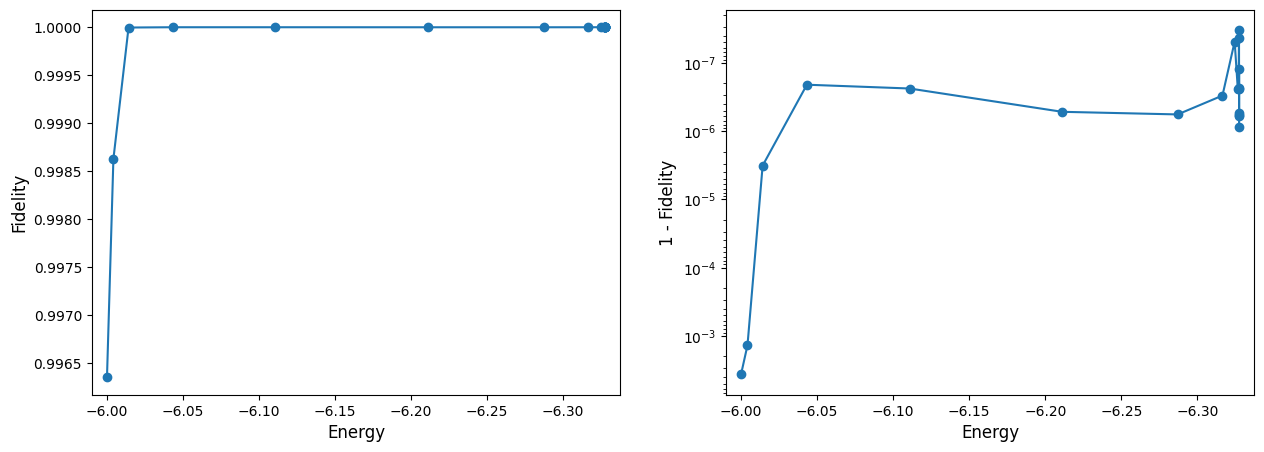

In [6]:
# 2024-01-17 Iter: 500, loss_tol: 1e-12, gtol: 1e-12
ind, num = 0, 1
path = f'./data_322/old_mat'  # path of subfolder
key = lambda x: [int(y) if y.isdigit() else y for y in re.split('(\d+)', x)]
uMPS_name = [i for i in dict_file(f'{path}/uMPS').values() if f'num{num}' in i]  # uMPS file name
uMPS_name = sorted(uMPS_name, key=key)  # sort 1,10,11,...,2 into 1,2,...,10,11
uMPS_num = len(uMPS_name)  # number of uMPS in subfolder
energy = np.array([loadmat(f'{path}/uMPS/{uMPS_name[i]}')['energy'][0][0] for i in range(uMPS_num)])
fidelity = {
    'num1': [
        0.9963501115273821, 0.9986255378358114, 0.9999968049307384, 0.9999997914850758, 0.9999997630235711,
        0.9999994795736982, 0.9999994315750385, 0.9999996991612291, 0.9999999513689395, 0.999999756578521,
        0.9999997569946619, 0.9999999668131621, 0.9999999571274998, 0.9999994559845724, 0.999999877044508,
        0.9999997666967089, 0.9999994142024324, 0.9999994079751954, 0.9999991333469795
    ],
    'num2': [
        0.9936371491921793, 0.9998413895065205, 0.9999999238848767, 0.9999998261529646, 0.9999998730835418,
        0.9999992583367974, 0.9999999490655138, 0.9999999782529083, 0.9999994306438991, 0.99999998229514,
        0.9999995634555819, 0.9999986772332452, 0.9999997568556303, 0.9999992261914328
    ],
    'num3': [
        0.9977384054625194, 0.9989687621056889, 0.9999994980624193, 0.9999998579236938, 0.999999554952602,
        0.9999987500964322, 0.9999964864347995, 0.9999982856647585, 0.999999453573, 0.9999995551704526,
        0.9999992718846639, 0.9999999701829814, 0.9999993775394753, 0.9999991911909039, 0.9999998769643839,
        0.9999991063364582, 0.999999593737054, 0.9999974337587729, 0.999997273117633, 0.9999999094956995,
        0.9999944776719654, 0.9999975582651637, 0.9999989867138329, 0.9999999730393971, 0.999999342961981,
        0.9999998004654385, 0.999999997472015
    ],
    'num4': [
        0.9765102570471846, 0.9999995635887, 0.9999990165586237, 0.999999992722676, 0.9999996115552525,
        0.9999999939486682, 0.9999994060639792, 0.9999999988290807, 0.9999999081528654, 0.9999999932183138,
        0.9999999968256156, 0.9999998277365552, 0.9999998261919906, 0.9999995425325316, 0.9999999925807567,
        0.999999992429967, 0.9999999511651126, 0.9999990913965662, 0.9999997524760061, 0.9999998121900529,
        0.9999999925896396, 0.9999984536591913, 0.9999990869493365, 0.9999998197242934, 0.9999998796175735,
        0.9999998446402523, 0.999999917076173, 0.9999987717367818, 0.9999998005328963
    ],
    'num5': [
        0.9985610759892491, 0.9999990120382192, 0.9999999505590405, 0.9999988868487458, 0.9999977908663584,
        0.9999998749916754, 0.9999988653547986, 0.9999998866431019, 0.9999998604243351, 0.9999999619204065,
        0.9999990184561406, 0.9999996040823064, 0.999999830276298, 0.9999996156967483, 0.9999995599043443,
        0.9999999765103684, 0.9999991302137238, 0.9999862447852008, 0.9999999856409315, 0.9999992354414939,
        0.9999997374931163, 0.9999986284809315
    ]
}
fidelity = np.array(fidelity[f'num{num}'])
print('Number of vec:', len(fidelity))
fidelity = fidelity[ind:]
energy = energy[ind:]
plot(energy, fidelity)